# Primer proyecto


## Marco teórico
Se escribirá un código para visualizar diferentes familias del conjunto de Julia y Mandelbrot, en el proceso se modelarán diversas formas biológicas. Ambos conjuntos se forman a partir del estudio de ciertas funciones, $f_c$, sobre las cuales se iteran los números complejos. La notación para la función, $f_c$, denota que ésta depende de un parámetro $c \in C$.

El conjunto de Julia $J_{f_c}$, para una constante $c$ particular, está formado por todos aquellos puntos del plano complejo en el cual la sucesión siguiente es acotada:

$$z_0=z$$
$$z_{n+1}=f_c(z_n)$$


El conjunto de Mandelbrot $M_{f_c}$, de forma similar, está formado por el conjunto de puntos del plano complejo, en el cual $c$ pertenece al conjunto si la siguiente sucesión es acotada:

$$z_0=0$$
$$z_{n+1}=f_c(z_n)$$

El conjunto de puntos que resulta de la sucesión, para cada $z$ implicado, se conoce como la órbita de $z$ por $f_c$. Para determinar los elementos de una familia del conjunto de $J_{f_c}$ y $M_{f_c}$, se utiliza un método iterativo, verificando el criterio convergencia siguiente, en cada paso de la iteración donde se obtiene un elemento de la órbita:

$$|z_n|<2$$

Si en algún punto de la iteración no se cumple el criterio, el punto del plano complejo analizado no pertenece al conjunto. 

El conjunto de Julia y Mandelbrot están dados por una familia muy popular de sistemas dinámicos complejos, esto es la familia de polinomios cuadráticos complejos:

$$f_c=z^2+c$$

Formas biológicas han sido representadas mediante procesos iterativos, como el descrito anteriormente. Pero, empleando un conjunto de funciones $(f_c)$ más complejas que las estudiadas en los conjuntos de Julia y Mandelbrot. A continuación, se listan algunas de las funciones usadas para reproducir formas biológicas:

$$f_1(z,c)=\sin(z)+z^2+c$$
$$f_2(z,c)=z^z+z^6+c$$
$$f_3(z,c)=z^z+z^6+c$$
$$f_4(z,c)=z^5+c$$
$$f_5(z,c)=z^3+c$$

La iteración es realizada hasta que la magnitud de la componente real e imaginaria de los elementos de la órbita sobrepasa un determinado valor $\tau$ (un valor puede ser $\tau=100$), esto significa que el proceso iterativo se mentiene mientras se cumpla que la parte real o imaginaria satisfacen la condición:

$$|Re(z_n)|<\tau$$ 

$$|Im(z_n)|<\tau$$

Una manera de graficar los conjuntos de Julia, Mandelbrot y las formas biológicas, es graficar solamente los puntos que pertenecen al conjunto con un color determinado (monocromático). 

Para agregar colores a los gráficos, generalmente se utiliza el algoritmo de: Tiempo de Escape, aunque no es el único. El algoritmo consiste en asignar un color dependiendo del número de iteraciones realizadas antes que el elemento de la órbita no satisfaga el criterio de convergencia. De esta manera se visualiza aquellos elementos que pertenecen al conjunto y los que no, además, revela la velocidad de divergencia de la órbita en cada punto. 

### Requisitos
Para el desarrollo del proyecto deberá utilizar solamente los elementos abarcados en la primera semana del workshop, esto es, el uso de: estructuras de datos y control, tipos de datos primitivos del lenguaje. Por lo que **no utilizará** ningún paquete adicional, creado o desarrollado por la comunidad de Julia, a excepción del paquete Plots.

Para completar este proyecto deberá realizar los siguientes items:
1. Graficar un conjunto de Julia, para un $c$ arbitrario (monocromático). 
2. Graficar el conjunto de Mandelbrot (monocromático).
3. Graficar una forma biológica, par un c arbitrario (monocromático).
4. Hacer una gráfica a color del conjunto de Mandelbrot usando el algoritmo de Tiempo de Escape.
5. Realizar una gráfica a color para un conjunto de Julia, para un $c$ arbitrario .
6. Realizar una gráfica a color para una forma biológica.

Para realizar las gráficas, deberá tomar en cuenta el uso de 'structs' para representar estructuras de datos particulares y también el uso de 'multiple dispatch'. 

### Criterios de Evaluación
Durante la evaluación del proyecto se tomarán en cuenta los siguientes aspectos:
- Cumplimiento de los requerimientos mencionados.
- Claridad y orden el código presentado.
- Completitud del proyecto, haciendo todas las partes que lo componen.
- Analizar y comentar el trabajo de otros grupos (Mediante el peer review).




## Bosquejo
### Gráficas
Para realizar las gráficas se utilizará el paquete Plots, por lo tanto el paquete debe ser importado:



In [1]:
using Plots

In [313]:
begin
	size = 50
	Plots.default(size = (2200,2200),titlefontsize = size, tickfontsize = size, legendfontsize = size, guidefontsize = size, legendtitlefontsize = size)
end



A continuación se mostrarán ejemplos para realizar gráficas con el paquete, los cuales pueden usarse para mostrar las formas biológicas y los conjuntos de Julia y Mandelbrot, una vez se hayan obtenido los datos necesarios.

Gráfico de números complejos:



In [314]:
begin
	r = 2	
	zcomplejo = [r*cos(θ)+r*sin(θ)*im for θ in 0:0.3:2*pi]
	scatter(zcomplejo, seriescolor=:white,
		    markerstrokecolor=:blue,
		    aspectratio=1,
		    title="Gráfica de ejemplo",
			legend=false,
			markersize=40)
end



Para colorear los gráficos del conjunto de Julia, Mandelbrot y las formas biológicas, utilizando el algoritmo de Tiempo de Escape,  se pueden utilizar mapas de calor. 



In [315]:
begin
	x = -2:0.3:2  
	y = -2:0.3:2
	colores = [i₁*i₂ for i₁ in x, i₂ in y]
	heatmap(x, y, colores, color=cgrad([:black,:blue,:white]), 
		    title="Ejemplo Mapa de Calor", xlabel="Re(z)", ylabel="Im(z)")
end



Para el mapa de calor, se necesita hacer una malla (las listas 'x' y 'y' del ejemplo anterior) y una matriz donde se guardan los valores que definen el color para cada punto de la malla.

### Pseudocódigo
Para clarificar los pasos a realizar, se muestra el siguiente algoritmo, cuando se desee obtener un gráfico con colores:

*NOTAS:* 
- Se utilizan algunas funciones que pertenecen al core y base de Julia, si no conoce o intuye su uso averigue sobre la función mediante `?<nombre_función>` o `methods(<nombre_función>)`.
- Usar `test_convergencia = b` para la creación de formas biológicas.
- Las variables rz, iz son las componentes real imaginaria del número complejo respectivamente, que define un punto de la región del plano complejo por analizar.
- La variable i es el contador del número de iteraciones.
- c y z representan números complejos.

~~~julia
1  Para rz = -2:0.3:2 Hacer ##Elección del rango puede ser diferente	
2  	  Para iz = -2:0.3:2 Hacer ##Elección del rango puede ser diferente	
3		z = complex(rz,iz)
4		##La precisión de la imagen es mejor si incrementa las iteraciones
5		Para i = 1:30 
6			z = f(z) + c
7			##Se verfica que z = complex(rz,iz) esté en el conjunto
8			##T depende del conjunto que se desea graficar
9			Si abs(z) > T Entonces break Fin 
10	   	Fin
11		color = i ##Indica la velocidad de divergencia de la orbita
12		Si test_convergencia = a Entonces 
13			Graficar punto en (rz,iz,color) 
14		Fin
15		Si test_convergencia = b Entonces 
16			Si real(z) < T || imag(z) < T Entonces
17				Graficar punto en (rz,iz,color) 
18			Fin
19		Fin
20	  Fin
21  Fin
~~~




## Solución




La solución del problema planteado puede seguir un camino diferente, pero siempre basado en el algoritmo proporcionado. Para completar la parte obligatoria de este proyecto rellene las partes que están incompletas de este documento, tome en cuenta la signatura de las funciones descritas y lo que esta debe hacer. A medida avance en el documento haga uso de las definiciones previas donde sea conveniente.




### Definición de objetos y funciones




+ A continuación construya un struct `Grid` (Grilla), donde se defina la región del plano complejo que debe ser analizado (límites en las abcisas y ordenadas) y el espacio entre cada punto de la grilla.

In [2]:
struct Grid{T<:Real}
    #Valor mínimo de la grilla
	min::T
    #Valor máximo de la grilla
    max::T
    #Espacion entre cada valor
    delta::T 
end


+ Defina una función que cree una matriz de rangos para los ejes de las abcisas y ordenas. 



In [3]:
function makeGrid(g::Grid)
    #Creacion de los valores consecutivos
	values=g.min:g.delta:g.max
    #Tamaño del vector de valores
    len=size(values)[1]
    #Matriz de ceros de tamaño nxn
    matrix=zeros(Complex,len,len)
    for i in 1:len
        for j in 1:len
            #LLenado de los valores de la matriz en forma compleja
            matrix[i,j]=values[i]+values[j]*im
        end
    end
    return matrix
end

makeGrid (generic function with 1 method)


+ Defina funciones de una línea para las formas biológicas y la familia de polinomios cuadráticos complejos 



In [30]:
begin
    #Función de Julia
    f(z,c)=z^2+c
    #Función biologica
    f_bio(z,c)=sin(z)+z^2+c
end

f_bio (generic function with 1 method)


+ Defina una función que retorne `true` si el criterio de convergencia para los conjuntos $J_{_c}$ y $M_{f_c}$ se cumple, `false` en caso contrario.



In [5]:
function testJM(z::Complex)
    #Se supone que es falso
	var=false
    if abs(z)<2 
        #Se guarda que resulto cierta la expresión
        var=true
        end 
    return var
end

testJM (generic function with 1 method)


+ Defina una función que `true` si el criterio de convergencia para las formas biológicas se cumple, `false` en caso contrario.



In [53]:
function testbiomorph(z::Complex,tau::Integer)
    #Se supone que es falsa
	var=false
    if real(z)<tau || imag(z)<tau
        #Se comprueba que era verdadera
        var=true
    end
    return var
end

testbiomorph (generic function with 2 methods)


+ Defina una función que itere un número sobre una función $f_c$ y devuelva true si se cumple el criterio de divergencia para $J_{f_c}$, $M_{f_c}$ y formas biológicas



In [7]:
function iterate(test::Function,f::Function,z::Complex,iter::Integer,c::Complex)
for i in 1:iter
        z=f(z,c)
end
return test(z)
end

iterate (generic function with 1 method)

Defina un función que devuelva el número de iteraciones realizadas para un dado z (número complejo), hasta que se no se cumple el criterio de divergencia.

In [8]:
function colormap(f::Function,test::Function,z::Complex,c::Complex)
    #Variable para que el ciclo while inicie
    var=true
    #COnteo 
    iter=0
    while var
        z=f(z,c)
        #Si es falso detendra el ciclo
        var=test(z)
        if var
            #Suma del conteo si esta dentro del criterio
            iter+=1
            end 
        end 
    return iter
end

colormap (generic function with 1 method)

+ Usando multiple dispatch, defina nuevamente la función colormap agregando un nuevo parámetro de entrada $\tau$, de modo que se pueda usar el test de convergencia para la forma biológica


In [9]:
"""
El término multiple dispatch se refiere a llamar a dos funciones con procesos distintas pero
con el mismo nombre, con la diferencia en el número de argumentos que tiene, en este caso
Julia sabra que función usar con el número de argumentos que damos
Referencias:
https://stackoverflow.com/questions/58700879/what-is-multiple-dispatch-and-how-does-one-use-it-in-julia
Ejemplo:
https://stackoverflow.com/questions/52224047/getting-started-with-julia-multiple-dispatch
"""
function colormap(f::Function,test::Function,z::Complex,c::Complex,iter::Integer,tau::Real)
    #Variable para iniciar el ciclo
	var=true
    #Conteo
    iter=0
    while var
        z=f(z,c)
        var=test(z,tau)
        #Si es falsa se dentra el conteo
        if var
            #Suma del conteo si cumple con el criterio
            iter+=1
            end 
        end 
    return iter
end

colormap


#### Solución a los incisos




Usando las definiciones anteriores realice lo indicado.




##### 1) Graficar un conjunto de Julia, para un $c$ arbitrario (monocromático).




+ Defina una funcion que retorne el conjunto de puntos que pertenecen al conjunto de Julia.



El inicio de esta función es generar una matriz de ceros, los cuales tendrás la siguiente representación 
+ 0 :  No esta contenido en $J_c$
+ 1 :  Esta en $J_c$

En seguida se hara un ciclo doble el cual recorrerá cada elemento de la matriz, para asi verificar si el elemento $\text{grid}_{i,j} \in J_c$, al termino de esta función se retornara la matriz de 0 y 1.

In [10]:
function setjulia(
		f::Function,
		test::Function,
		grid::Array{T,2} where T,
		c::Complex,
		iter::Integer)
    #Inicio del mapa de valores
    map=zeros(size(grid,1),size(grid,2))
	for i in 1:size(grid,1)
        for j in 1:size(grid,2)
            #Conteo, para este caso iter siempre sera 1
            var=iterate(test,f,grid[i,j],iter,c)
            if var
                map[i,j]=1
            else
                map[i,j]=0
            end
        end
    end
    return map
end


setjulia (generic function with 1 method)

Pasos del algoritmo:

+ Definir el objeto grid con los parámetros de la grilla, valor mínimo, máximo y separación entre cada valor
+ Cración de la matriz con los valores de cada elemento complejo
+ Obtención de los valores que estan dentro del conjunto $J_c$
+ Gráfica de los valores dentro del conjunto $J_c$

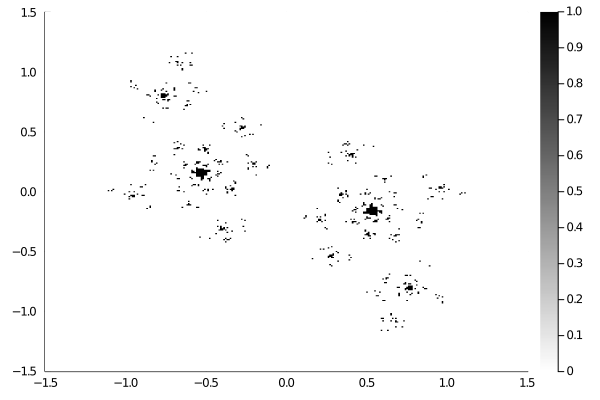

In [21]:
begin
grid=Grid(-1.5,1.5,0.01)
matrix=makeGrid(grid)
map=setjulia(f,testJM,matrix,0.1+0.7im,30)
x=grid.min:grid.delta:grid.max
heatmap(x,x,map,color=cgrad([:white,:black]))
end



#### 2) Graficar el conjunto de Mandelbrot (monocromático).




+ Defina una funcion que retorne el conjunto de puntos que pertenecen al conjunto de Mandelbrot



El inicio de esta función es generar una matriz de ceros, los cuales tendrás la siguiente representación 
+ 0 :  No esta contenido en $J_c$
+ 1 :  Esta en $J_c$

En seguida se hara un ciclo doble el cual recorrerá cada elemento de la matriz, para asi verificar si el elemento $\text{grid}_{i,j} \in J_c$, al termino de esta función se retornara la matriz de 0 y 1.

La diferencia entre setjulia() y setmandelbrot() es que la constante c, en Julia es arbitraria y en Mandelbrot es igual a 0

In [31]:
function setmandelbrot(
		f::Function,
		test::Function,
		grid::Array{T,2} where T,
		iter::Integer)
    #Requerimiento de Mandelbrot, debe ser un 0 pero complejo, requerimiento del código
    c=0+0im
    #Inicio del mapa de valores
    map=zeros(size(grid,1),size(grid,2))
	for i in 1:size(grid,1)
        for j in 1:size(grid,2)
            var=iterate(test,f,grid[i,j],iter,c)
            if var
                map[i,j]=1
            else
                map[i,j]=0
            end
        end
    end
    return map
end

setmandelbrot (generic function with 1 method)

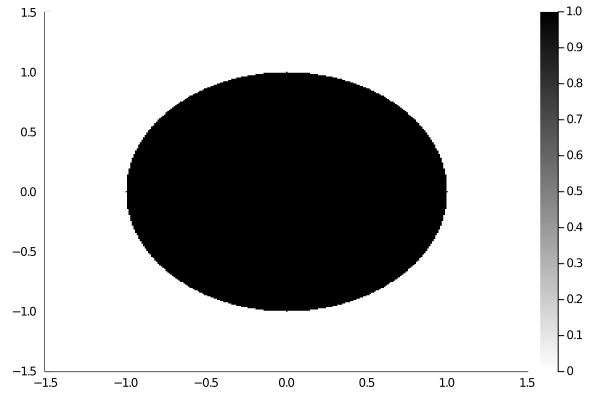

In [34]:
begin
    grid=Grid(-1.5,1.5,0.01)
    matrix=makeGrid(grid)
    map=setmandelbrot(f,testJM,matrix,1)
    x=grid.min:grid.delta:grid.max
    heatmap(x,x,map,color=cgrad([:white,:black]))
end



#### 3) Graficar una forma biológica, par un c arbitrario (monocromático).




+ Defina una funcion que retorne el conjunto de puntos que pertenecen al conjunto de una forma biológica.



Para este caso, al ya existir una funcion iterate la cual no tiene definida como parametro de entrada $\tau$ se creara otra funcion con el mismo nombre en donde se implemente multiple dispatch

In [36]:
function iterate(test::Function,f::Function,z::Complex,iter::Integer,c::Complex,tau::Integer)
for i in 1:iter
        z=f(z,c)
end
return test(z,tau)
end

iterate (generic function with 2 methods)

In [37]:
function setbiomorph(
		f::Function,
		test::Function,
		grid::Array{T,2} where T,
		c::Complex,
		iter::Integer,
		tau::Integer)
    #Inicio del mapa de valores
    map=zeros(size(grid,1),size(grid,2))
	for i in 1:size(grid,1)
        for j in 1:size(grid,2)
            var=iterate(test,f,grid[i,j],iter,c,tau)
            if var
                map[i,j]=1
            else
                map[i,j]=0
            end
        end
    end
    return map
end


setbiomorph (generic function with 1 method)

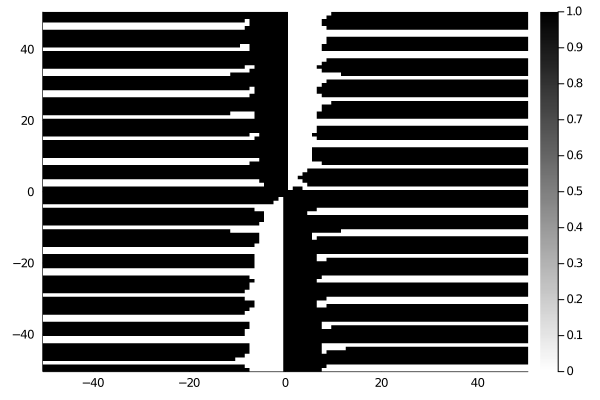

In [58]:
begin
    grid=Grid(-50,50,1)
    matrix=makeGrid(grid)
    map=setbiomorph(f_bio,testbiomorph,matrix,0.1+0.7im,1,1)
    x=grid.min:grid.delta:grid.max
    heatmap(x,x,map,color=cgrad([:white,:black]))
end


#### 4) Hacer una gráfica a color del conjunto de Mandelbrot 

Usando el algoritmo de Tiempo de Escape y multiple dispatch, defina nuevamente la función setmandelbrot, para obtener los datos necesarios (matriz) que defina los colores para cada punto de una región arbitraria. 



In [60]:
function setmandelbrot(
		f::Function,
		test::Function,
		grid::Array{T,1} where T,
		iter::Integer,
        c::Complex)
    #Requisito para el conjunto de Mndelbrot
    c=0+0im
    #Inicio del mapa de valores
    map=zeros(size(grid,1),size(grid,2))
	for i in 1:size(grid,1)
        for j in 1:size(grid,2)
            var=colormap(f,test,grid[i,j],iter,c)
        end
    end
    max=maximum(map)
    map=map/max
    return map
end


setmandelbrot (generic function with 2 methods)

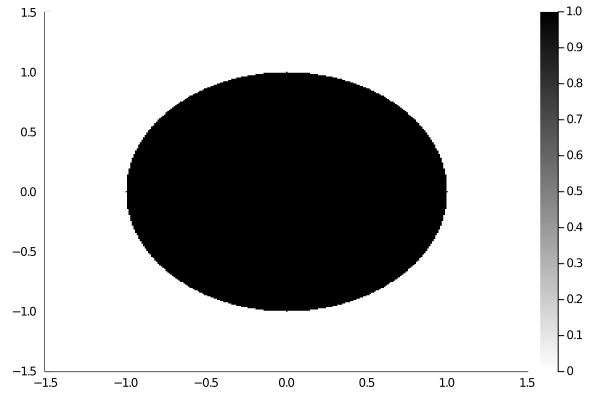

In [61]:
begin
    grid=Grid(-1.5,1.5,0.01)
    matrix=makeGrid(grid)
    map=setmandelbrot(f,testJM,matrix,20)
    x=grid.min:grid.delta:grid.max
    heatmap(x,x,map,color=cgrad([:white,:black]))
end



#### 5) Realizar una gráfica a color para un conjunto de Julia, para un $c$ arbitrario.

Usando el algoritmo de Tiempo de Escape y multiple dispatch, defina nuevamente la función setjulia, para obtener los datos necesarios (matriz) que defina los colores para cada punto de una región arbitraria. 



In [332]:
begin
	## Su código aquí	
end



#### 6) Realizar una gráfica a color para una forma biológica.

Usando el algoritmo de Tiempo de Escape y multiple dispatch, defina nuevamente la función setbiomorph, para obtener los datos necesarios (matriz) que defina los colores para cada punto de una región arbitraria.



In [333]:
begin
	## Su código aquí	
end



#### 7) Completar un ejercicio que forma parte de los challenge problems.

